Our goal is to create machine learning models capable of predicting whether an individual has diabetes, with the aim of allowing these models to serve as a substitute for human personnel in regions with limited medical resources.

For which machine learning models are we aiming to build? We aim to create a minimum of three models to facilitate comparative analysis for selecting the most suitable model for recommendation. We will use accuracy to rank the machine learning models and the best model will be the model with the best accuracy across the three models.

Let us examine the dataset once more :* diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.*    From the word classes , we can make the word => Classification. So we will look at the analysis as a classification problem!  So , a classfication problem is a supervised learning example. So for our dataset, we will use supervised machine learning models.

Supervised learning models: Logistic regression, Decision trees, and Random Forest classifier

In [ ]:
# https://www.kaggle.com/code/victorumesiobi/analyzing-the-effectiveness-of-ai-algorithms (Comparing algorithms)

https://raw.githubusercontent.com/R4pidAce/Reseach8412/main/diabetes_012_health_indicators_BRFSS2015.csv

https://raw.githubusercontent.com/R4pidAce/Reseach8412/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv

https://raw.githubusercontent.com/R4pidAce/Reseach8412/main/diabetes_binary_health_indicators_BRFSS2015.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

Load the dataset

In [ ]:
#diabetes1 = pd.read_csv("https://raw.githubusercontent.com/R4pidAce/Reseach8412/main/diabetes_binary_health_indicators_BRFSS2015.csv")
#diabetes2 = pd.read_csv("https://raw.githubusercontent.com/R4pidAce/Reseach8412/main/diabetes_012_health_indicators_BRFSS2015.csv")

diabetes = pd.read_csv("https://raw.githubusercontent.com/R4pidAce/Reseach8412/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
#combined_data = pd.concat([diabetes1, diabetes2, diabetes3], ignore_index=True)




In [ ]:
#diabetes = pd.read_csv("https://raw.githubusercontent.com/R4pidAce/Reseach8412/main/diabetes_binary_health_indicators_BRFSS2015.csv")
# Define the size of the random section
section_size = 250000  # You can change this value to your desired section size
import random
# Randomly select 'section_size' number of rows from the combined dataset
#random_section = random.sample(range(len(combined_data)), section_size)

# Extract the random section from the combined dataset
#diabetes = combined_data.iloc[random_section]
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


# Cleaning the dataset

In [ ]:
'''
    Data Preparation and Cleaning
'''

'''
    Check for null values
'''
null_columns = diabetes.columns[diabetes.isna().any()].tolist()
null_count = diabetes['Diabetes_binary'].isnull().sum()

print('Columns with missing values: ', null_columns)
print('Columns with missing values: ', null_count)

# We cannot continue with data transformation because the data is already cleaned
diabetes.describe()

Columns with missing values:  []
Columns with missing values:  0


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Remove null values in a ceratin column

diabetes.dropna(subset=['Diabetes_binary'], inplace=True)

Data Visualisation



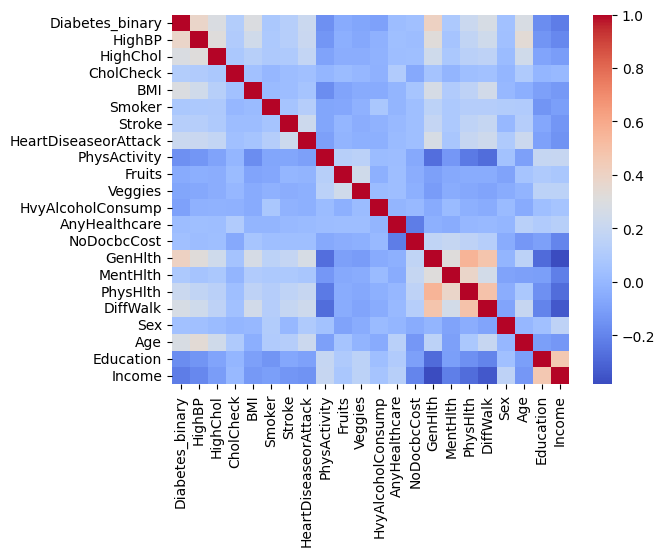

In [ ]:
corr_matrix = diabetes.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

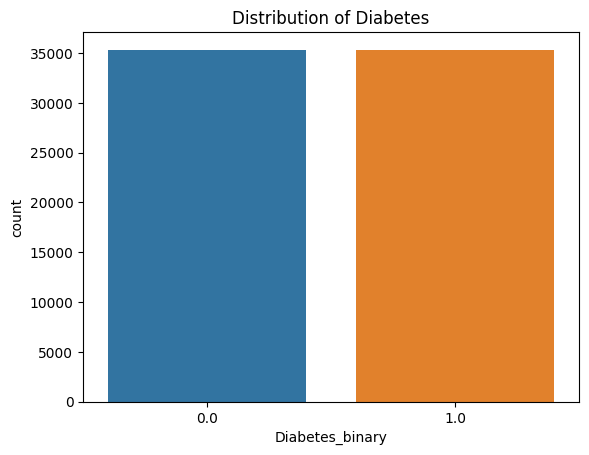

In [ ]:
'''
    Plot categories of diabetes
'''

sns.countplot(x='Diabetes_binary', data=diabetes)
plt.title('Distribution of Diabetes')
plt.show()

In [ ]:
import plotly.express as px
sns.set_style('darkgrid')
import matplotlib
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'
px.histogram(diabetes,x='Age',title='Age Vs Diabetes', color='Diabetes_binary')


In [ ]:
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'
px.histogram(diabetes,x='HighBP',title='High BP Vs Diabetes', color='Diabetes_binary')

In [ ]:
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'
px.histogram(diabetes,x='PhysHlth',title='Physical Health Vs Diabetes', color='Diabetes_binary')

In [ ]:
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'
px.histogram(diabetes,x='BMI',title='BMI Vs Diabetes', color='Diabetes_binary')

In [ ]:
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'
px.histogram(diabetes,x='HighChol',title='High Cholestrol Vs Diabetes', color='Diabetes_binary')

In [ ]:
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'
px.histogram(diabetes,x='Smoker',title='Smoking levels Vs Diabetes', color='Diabetes_binary')

In [ ]:
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'
px.histogram(diabetes,x='CholCheck',title='Cholestrol check  Vs Diabetes', color='Diabetes_binary')

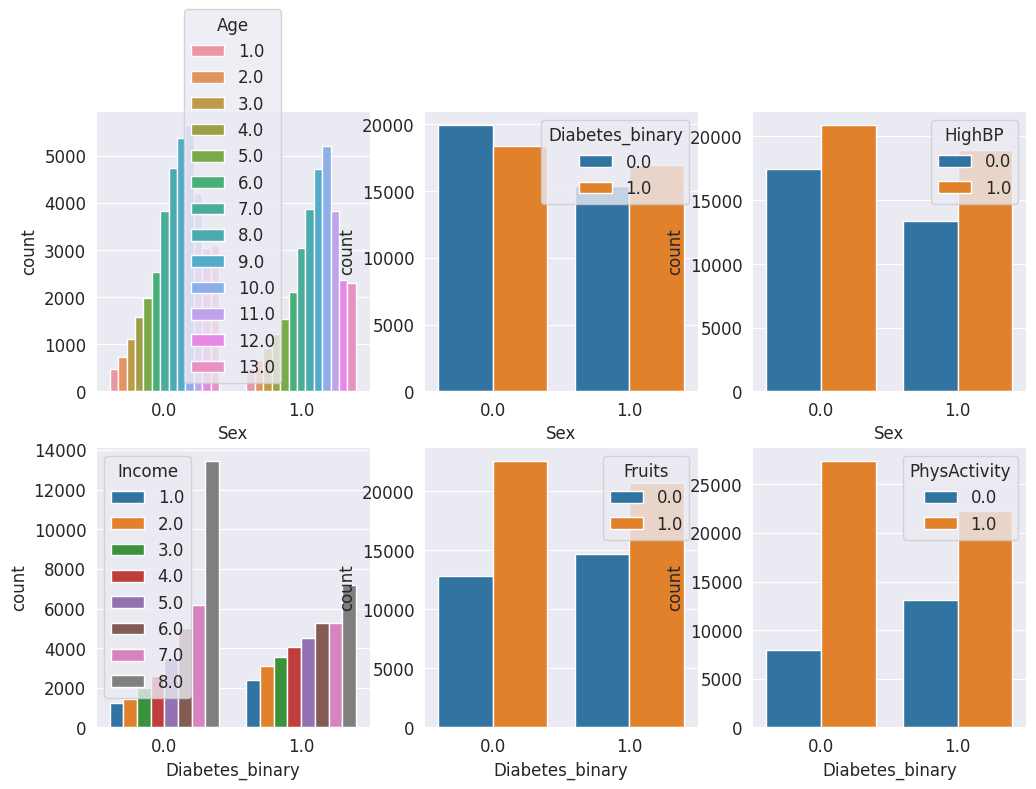

In [ ]:
fig, ax = plt.subplots(2,3)
sns.countplot(x="Sex", hue="Age", data=diabetes, ax=ax[0,0])
sns.countplot(x="Sex", hue="Diabetes_binary", data=diabetes, ax=ax[0,1])
sns.countplot(x="Sex", hue="HighBP", data=diabetes, ax=ax[0,2])
sns.countplot(x="Diabetes_binary", hue="Income", data=diabetes, ax=ax[1,0])
sns.countplot(x="Diabetes_binary", hue="Fruits", data=diabetes, ax=ax[1,1])
sns.countplot(x="Diabetes_binary", hue="PhysActivity", data=diabetes, ax=ax[1,2])
fig.show()

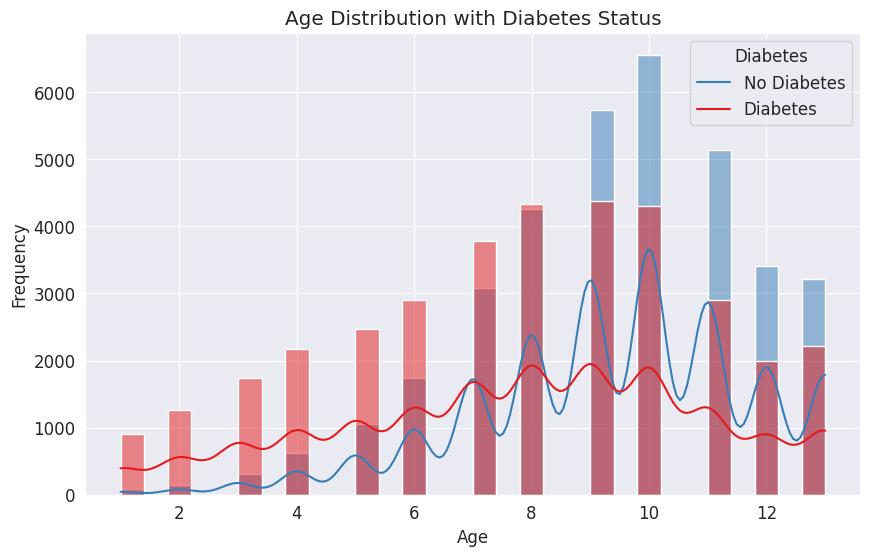

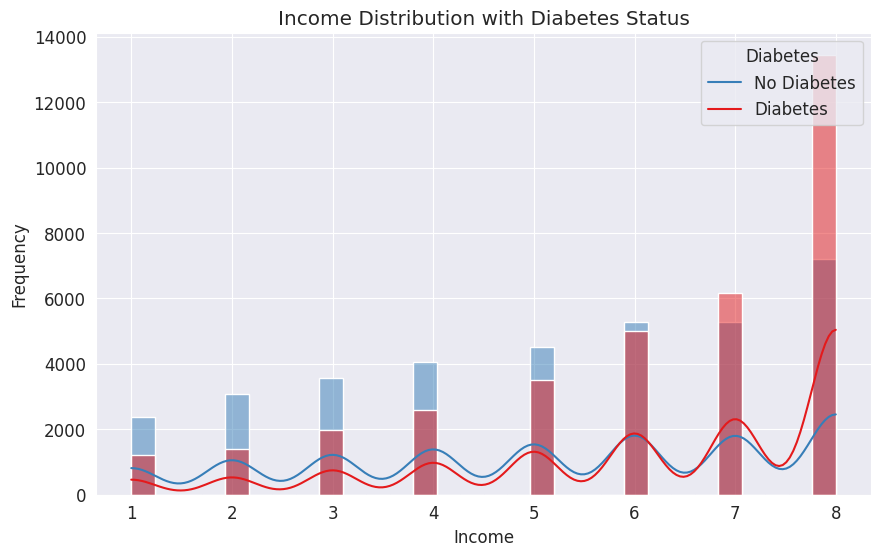

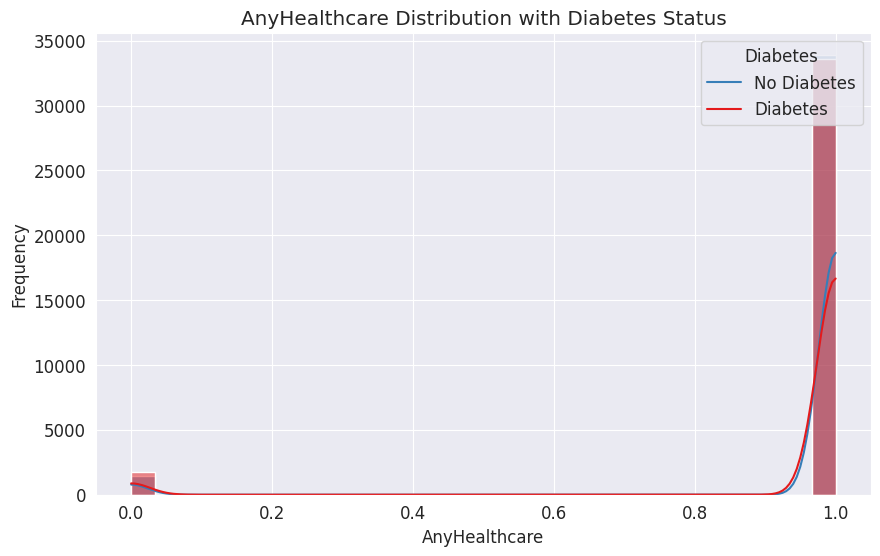

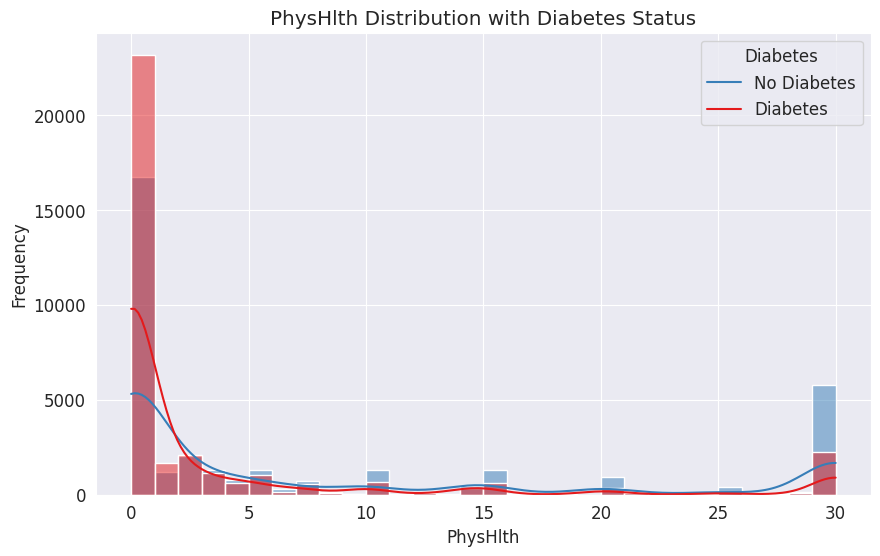

In [ ]:
elements = ["Age", "Income", "AnyHealthcare","PhysHlth"]
for element in elements:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=diabetes, x=element, hue='Diabetes_binary', bins=30, kde=True, palette="Set1")
    plt.title(f'{element} Distribution with Diabetes Status')
    plt.xlabel(element)
    plt.ylabel('Frequency')
    plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes', 'Diabetes'])
    plt.show()

So we have established 9 key factors that affect diabates: Age, High BP, BMI, High Chol, Physical activity, HeartDiseaseorAttack,HvyAlcoholConsump,Smoker

In [ ]:
#Identifying Inputs And Targets :
input_cols=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
        'HeartDiseaseorAttack', 'PhysActivity',
       'HvyAlcoholConsump',  'Age']
target_cols='Diabetes_binary'

In [ ]:
#Spliting The Data :
train_val_df,test_df=train_test_split(diabetes,test_size=0.2,random_state=2)
train_df,val_df=train_test_split(train_val_df,test_size=0.2,random_state=2)

In [ ]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

In [ ]:
print('train_df.shape : ',train_df.shape)
print('val_df.shape : ',val_df.shape)
print('test_df.shape : ',test_df.shape)

train_df.shape :  (45242, 22)
val_df.shape :  (11311, 22)
test_df.shape :  (14139, 22)


In [ ]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()

In [ ]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_cols].copy()

# Model 1: Logistic Reegression

```
# This is formatted as code
```



In [ ]:
#Logistic Model:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X_train=train_inputs
X_val=val_inputs
X_test=test_inputs
LogModel=LogisticRegression(solver='liblinear')
LogModel.fit(X_train,train_targets)
Logtrain_preds=LogModel.predict(X_train)
Logval_preds=LogModel.predict(X_val)
Logtest_preds=LogModel.predict(X_test)

Logtrain_score=accuracy_score(train_targets,Logtrain_preds)
Logval_score=accuracy_score(val_targets,Logval_preds)
Logtest_score=accuracy_score(test_targets,Logtest_preds)

LR_Training_Accuracy = metrics.accuracy_score(test_targets, Logtest_preds)
LR_Training_Precision = metrics.precision_score(test_targets, Logtest_preds)
LR_Training_Recall = metrics.recall_score(Logtest_preds, Logtest_preds)
print("Accuracy on Logistic Regression training data: ",Logtrain_score )
# print("Precision on  Logistic Regression training data:",Logval_score )
# print("Recall on  Logistic Regression data:",LR_Training_Recall)

print("Accuracy on Logistic Regression testing data: ",LR_Training_Accuracy )
print("Precision on  Logistic Regression testing data:",LR_Training_Precision )
print("Recall on  Logistic Regression data:",LR_Training_Recall)

Accuracy on Logistic Regression training data:  0.7272666990849211
Accuracy on Logistic Regression testing data:  0.7280571468986491
Precision on  Logistic Regression testing data: 0.7108206441180434
Recall on  Logistic Regression data: 1.0


In [ ]:
#Scores of All Models:
print('The Accuracy Score from Logistics Regression are : For Training Data Set {}, For Validation Dataset {}, For Test Dataset {}'.format(Logtrain_score,Logval_score,Logtest_score))

The Accuracy Score from Logistics Regression are : For Training Data Set 0.7272666990849211, For Validation Dataset 0.7321191760233401, For Test Dataset 0.7280571468986491


Model 2: Decisison tree

In [ ]:
modelDT = DecisionTreeClassifier(random_state=2, max_depth=3, min_samples_leaf=5)
modelDT.fit(X_train,train_targets)

train_predictDT = modelDT.predict(X_train)
Y_train=train_targets
Y_val=val_targets
Y_test=test_targets
dt_Training_Accuracy = metrics.accuracy_score(Y_train, train_predictDT)
dt_Training_Precision = metrics.precision_score(Y_train, train_predictDT)
dt_Training_Recall = metrics.recall_score(Y_train, train_predictDT)
print("Accuracy on Decision Tree training data: ",dt_Training_Accuracy )
print("Precision on Decision Tree training data:",dt_Training_Precision )
print("Recall on Decision Tree training data:",dt_Training_Recall)

test_predictDT = modelDT.predict(X_test)

dt_Test_Accuracy = metrics.accuracy_score(Y_test, test_predictDT)
dt_Test_Precision = metrics.precision_score(Y_test, test_predictDT)
dt_Test_Recall = metrics.recall_score(Y_test, test_predictDT)
print("Accuracy on Decision Tree test data: ", dt_Test_Accuracy)
print("Precision on Decision Tree  test data:", dt_Test_Precision)
print("Recall on Decision Tree test data:", dt_Test_Recall)

Accuracy on Decision Tree training data:  0.692940188320587
Precision on Decision Tree training data: 0.6713324568865517
Recall on Decision Tree training data: 0.7630306759251121
Accuracy on Decision Tree test data:  0.6956644741495155
Precision on Decision Tree  test data: 0.6672092149743333
Recall on Decision Tree test data: 0.7641238887295669


In [ ]:
# Improve the decision tree

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3],
    'min_samples_split': [10],
    'min_samples_leaf': [5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=2), param_grid, cv=10)
grid_search.fit(X_train, train_targets)

best_model = grid_search.best_estimator_

In [ ]:
train_predictDT = best_model.predict(X_train)
dt_Training_Accuracy = metrics.accuracy_score(Y_train, train_predictDT)
dt_Training_Precision = metrics.precision_score(Y_train, train_predictDT)
dt_Training_Recall = metrics.recall_score(Y_train, train_predictDT)

test_predictDT = best_model.predict(X_test)
dt_Test_Accuracy = metrics.accuracy_score(Y_test, test_predictDT)
dt_Test_Precision = metrics.precision_score(Y_test, test_predictDT)
dt_Test_Recall = metrics.recall_score(Y_test, test_predictDT)
print("Accuracy on Decision Tree training data: ",dt_Training_Accuracy )
print("Precision on Decision Tree training data:",dt_Training_Precision )
print("Recall on Decision Tree training data:",dt_Training_Recall)


Accuracy on Decision Tree training data:  0.692940188320587
Precision on Decision Tree training data: 0.6713324568865517
Recall on Decision Tree training data: 0.7630306759251121


In [ ]:
print("Accuracy on Decision Tree test data: ", dt_Test_Accuracy)
print("Precision on Decision Tree  test data:", dt_Test_Precision)
print("Recall on Decision Tree test data:", dt_Test_Recall)

Accuracy on Decision Tree test data:  0.6956644741495155
Precision on Decision Tree  test data: 0.6672092149743333
Recall on Decision Tree test data: 0.7641238887295669


Model 3: Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifiern_estimators=50,max_depth=2,min_samples_leaf=10, max_features='sqrt',min_samples_split=20

modelRF = RandomForestClassifier(random_state=2,)
modelRF.fit(X_train,Y_train)

train_predictRF = modelRF.predict(X_train)

rf_Training_Accuracy = metrics.accuracy_score(Y_train, train_predictRF)
rf_Training_Precision =metrics.precision_score(Y_train, train_predictRF)
rf_Training_Recall = metrics.recall_score(Y_train, train_predictRF)

print("Accuracy on Random Forest training data: ", rf_Training_Accuracy)
print("Precision on Random Forest training data:", rf_Training_Precision)
print("Recall on Random Forest training data:", rf_Training_Recall)

test_predictRF = modelRF.predict(X_test)

rf_Test_Accuracy = metrics.accuracy_score(Y_test, test_predictRF)
rf_Test_Precision = metrics.precision_score(Y_test, test_predictRF)
rf_Test_Recall = metrics.recall_score(Y_test, test_predictRF)

print("Accuracy on Random Forest test data: ", rf_Test_Accuracy)
print("Precision on Random Forest test data:", rf_Test_Precision)

Accuracy on Random Forest training data:  0.7147561999911587
Precision on Random Forest training data: 0.7026793431287813
Recall on Random Forest training data: 0.7503296123758461
Accuracy on Random Forest test data:  0.7182969092580805
Precision on Random Forest test data: 0.6981582085596926


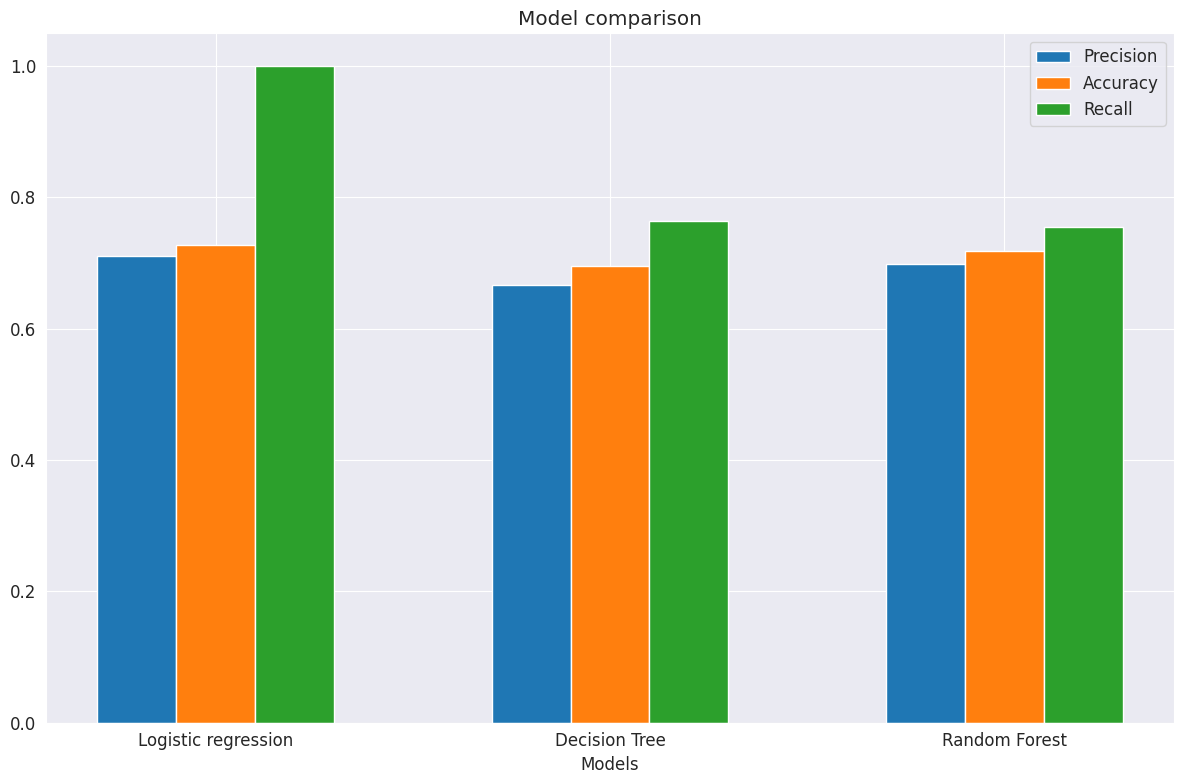

In [ ]:
models = ['Logistic regression', 'Decision Tree', 'Random Forest']
precision = [LR_Training_Precision, dt_Test_Precision, rf_Test_Precision]
accuracy = [LR_Training_Accuracy, dt_Test_Accuracy, rf_Test_Accuracy]
recall = [LR_Training_Recall, dt_Test_Recall, rf_Test_Recall]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))

rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, accuracy, width, label='Accuracy')
rects3 = ax.bar(x + width, recall, width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Model comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
print(precision)
print(accuracy)
print(recall)

[0.7108206441180434, 0.6672092149743333, 0.6981582085596926]
[0.7280571468986491, 0.6956644741495155, 0.7182969092580805]
[1.0, 0.7641238887295669, 0.7555205047318612]
